In [2]:
# Philippine dengue cases from 2016-2020

In [48]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [50]:
# Load and clean data
file_path = "Philippine dengue cases from 2016-2020.xlsx"
df = pd.read_excel(file_path, sheet_name="PH dengue cases from 2016-2020")
df_clean = df.dropna()
df_clean['Year'] = df_clean['Year'].astype(int)  # Ensure year is not decimal
print("Data shape after cleaning:", df_clean.shape)
df_clean.head()

Data shape after cleaning: (1020, 5)


,Month,Year,Region,Dengue Cases,Dengue Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1


In [52]:
# Remove outliers
Q1 = df_clean['Dengue Cases'].quantile(0.25)
Q3 = df_clean['Dengue Cases'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_clean_no_outliers = df_clean[(df_clean['Dengue Cases'] >= lower_bound) & (df_clean['Dengue Cases'] <= upper_bound)].copy()
df_clean_no_outliers.loc[:, 'Year'] = df_clean_no_outliers['Year'].astype(int)  # Ensure year stays as int
print("After removing outliers:", df_clean_no_outliers.shape[0])


After removing outliers: 923


In [54]:
# NumPy operations
mean_cases = np.mean(df_clean_no_outliers['Dengue Cases'])
std_deaths = np.std(df_clean_no_outliers['Dengue Deaths'])
max_cases = np.max(df_clean_no_outliers['Dengue Cases'])
sum_deaths = np.sum(df_clean_no_outliers['Dengue Deaths'])
median_cases = np.median(df_clean_no_outliers['Dengue Cases'])
print("Mean cases:", mean_cases)
print("Std deaths:", std_deaths)
print("Max cases:", max_cases)
print("Sum deaths:", sum_deaths)
print("Median cases:", median_cases)

Mean cases: 735.4160346695558
Std deaths: 101.11246774025437
Max cases: 2831
Sum deaths: 14901
Median cases: 488.0


In [56]:
# SciPy correlation between Dengue Cases and Year (independent)
corr, p_value = stats.pearsonr(df_clean_no_outliers['Dengue Cases'], df_clean_no_outliers['Year'])
print("Correlation between Dengue Cases and Year (no outliers):", corr)
print("P-value:", p_value)

Correlation between Dengue Cases and Year (no outliers): -0.0782356149932813
P-value: 0.017440218876975905


In [58]:
# Statsmodels regression
X = sm.add_constant(df_clean_no_outliers['Year'])
y = df_clean_no_outliers['Dengue Cases']
model = sm.OLS(y, X).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:           Dengue Cases   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     5.672
Date:                Thu, 29 May 2025   Prob (F-statistic):             0.0174
Time:                        18:37:32   Log-Likelihood:                -7327.3
No. Observations:                 923   AIC:                         1.466e+04
Df Residuals:                     921   BIC:                         1.467e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.553e+04   3.14e+04      2.405      0.0

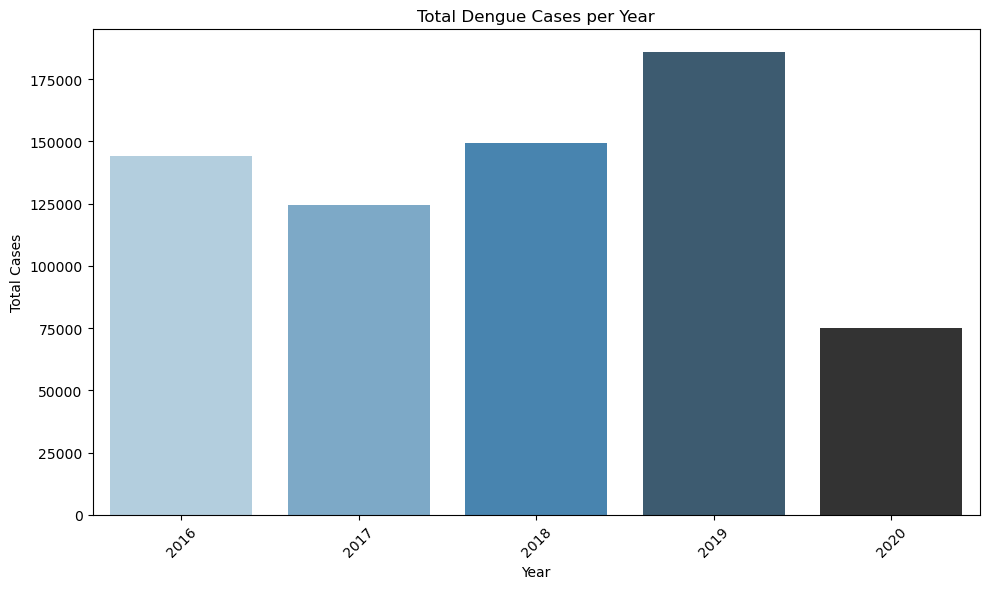

In [60]:
# Visualization 1 - Barplot of dengue cases per year
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_clean_no_outliers,
    x='Year',
    y='Dengue Cases',
    estimator=sum,
    errorbar=None,
    hue='Year',
    palette='Blues_d',
    legend=False
)
plt.title('Total Dengue Cases per Year')
plt.ylabel('Total Cases')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

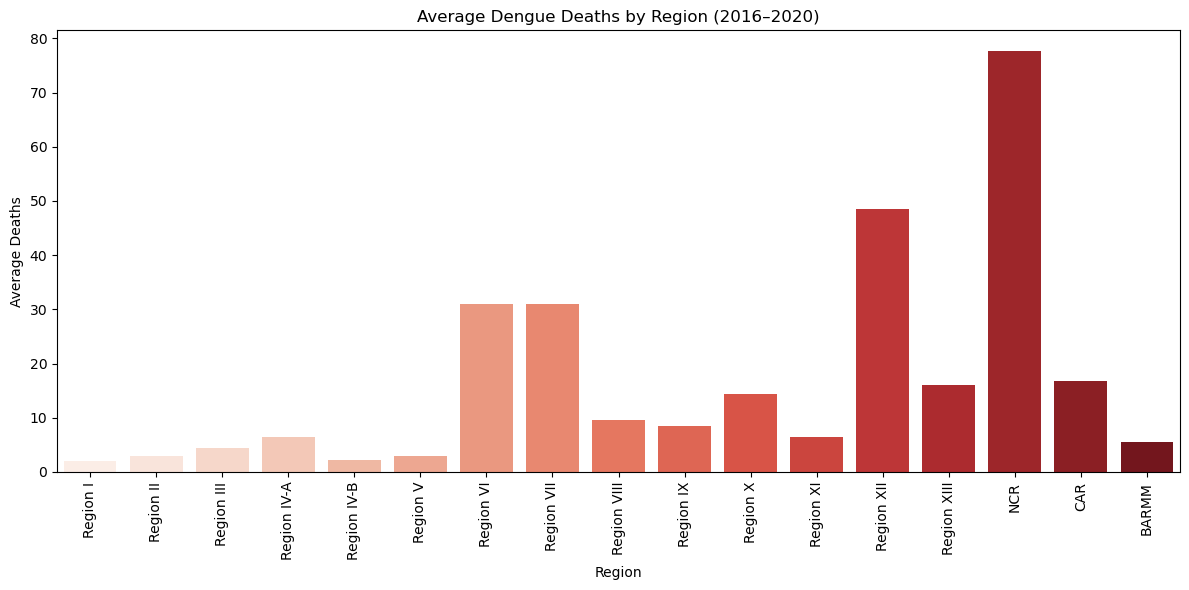

In [62]:
# Visualization 2 - Average deaths by region
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_clean_no_outliers,
    x='Region',
    y='Dengue Deaths',
    estimator=np.mean,
    errorbar=None,
    hue='Region',
    palette='Reds',
    legend=False
)
plt.title('Average Dengue Deaths by Region (2016–2020)')
plt.ylabel('Average Deaths')
plt.xlabel('Region')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

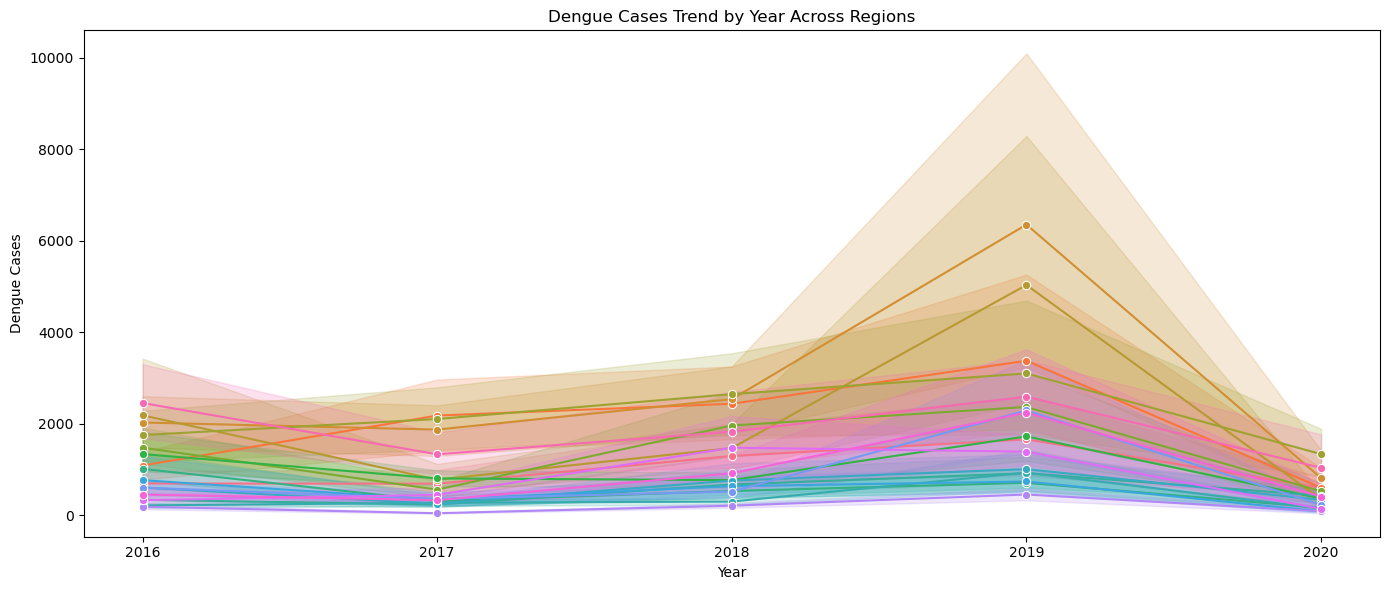

In [66]:
# Visualization 3 - Lineplot of dengue cases trend
df_clean['Time Label'] = df_clean['Year'].astype(str) + " - " + df_clean['Region']
df_sorted = df_clean.sort_values(by='Year')
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_sorted, x='Year', y='Dengue Cases', hue='Region', marker='o', legend=False)
plt.title('Dengue Cases Trend by Year Across Regions')
plt.ylabel('Dengue Cases')
plt.xlabel('Year')
plt.xticks(ticks=sorted(df_sorted['Year'].unique()), labels=sorted(df_sorted['Year'].unique()))
plt.tight_layout()
plt.show()

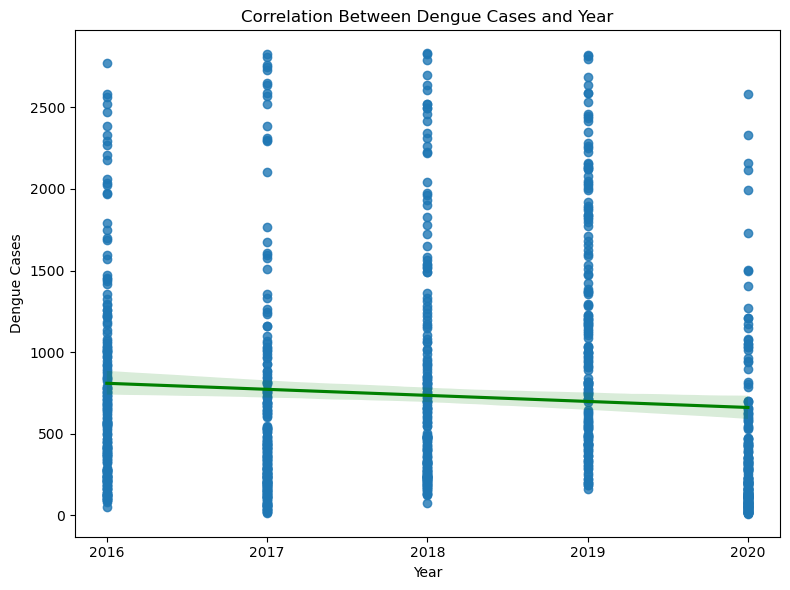

In [70]:
# Correlation plot - Dengue Cases vs Year
plt.figure(figsize=(8, 6))
sns.regplot(x='Year', y='Dengue Cases', data=df_clean_no_outliers, line_kws={"color": "green"})
plt.title('Correlation Between Dengue Cases and Year')
plt.xlabel('Year')
plt.xticks(ticks=sorted(df_sorted['Year'].unique()), labels=sorted(df_sorted['Year'].unique()))
plt.ylabel('Dengue Cases')
plt.tight_layout()
plt.show()


In [72]:
# Bonus correlation - Year vs Dengue Deaths
year_corr, year_pval = stats.pearsonr(df_clean_no_outliers['Year'], df_clean_no_outliers['Dengue Deaths'])
print(f"Correlation between Year and Dengue Deaths: {year_corr:.3f} (p = {year_pval:.3f})")

Correlation between Year and Dengue Deaths: -0.125 (p = 0.000)


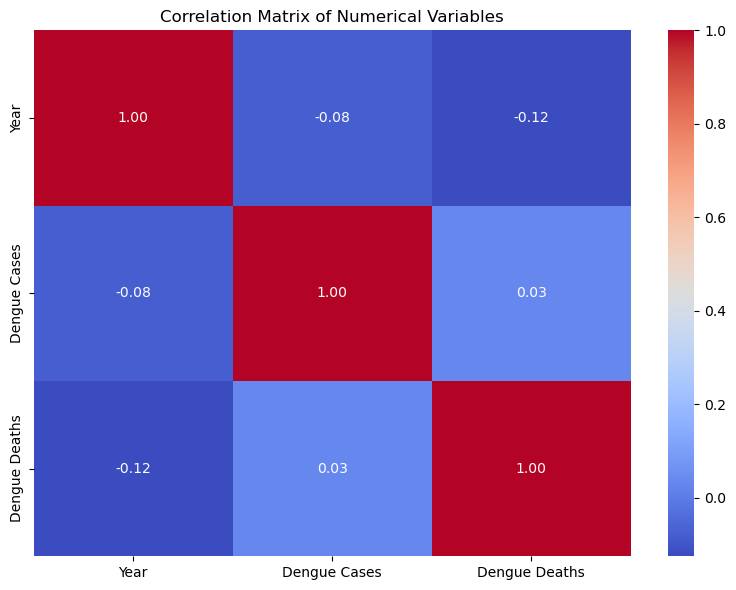

In [74]:
# Correlation Matrix to Find Strongest Correlations
plt.figure(figsize=(8, 6))
numeric_cols = df_clean_no_outliers.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Variables")
plt.tight_layout()
plt.show()
